In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0305/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 469 ms, sys: 18 ms, total: 487 ms
Wall time: 489 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,0.027815,0.0,0.116108,0.0,-0.009122,0.0,-0.038291,0.0,-0.005659,...,0.001227,0.037232,0.0,-0.013367,0.0,-0.011087,0.0,-0.005968,0.0,-0.004036
1,0.0,0.032823,0.0,0.129100,0.0,-0.005775,0.0,-0.021014,0.0,0.001228,...,0.000000,0.023543,0.0,-0.006859,0.0,-0.008310,0.0,-0.004277,0.0,0.005629
2,0.0,0.056064,0.0,0.132815,0.0,-0.009501,0.0,-0.022101,0.0,-0.000251,...,0.000000,0.020452,0.0,-0.011871,0.0,-0.021084,0.0,-0.006889,0.0,-0.004282
3,0.0,0.007303,0.0,0.091270,0.0,-0.006199,0.0,-0.004520,0.0,0.004552,...,0.000000,-0.002861,0.0,0.007962,0.0,0.010960,0.0,0.000490,0.0,0.004070
4,0.0,0.018150,0.0,0.080838,0.0,-0.001131,0.0,-0.009265,0.0,-0.000666,...,0.000000,-0.006365,0.0,0.000253,0.0,0.006907,0.0,-0.002572,0.0,0.006326


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.051862,0.001227,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,2.054415e-08,0.000658,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.004724,0.008987,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017631,0.004754,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.053230,0.001228,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.054415e-08,0.000659,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.004735,9.027359e-03,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.017787,0.004765,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.110501,0.853825,4.700175e-07,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000337,0.000337,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    46.000000
1    35.000000
2    37.000000
3    30.000651
4    35.001190
5    28.999994
6    20.000018
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.027815,0.116108,-0.009122,-0.038291,-0.005659,-0.054602,0.060372,-0.015025,-0.041848,-0.016859,...,0.007488,0.033088,0.033087,0.010218,0.058098,0.037232,-0.013367,-0.011087,-0.005968,-0.004036
1,0.032823,0.129100,-0.005775,-0.021014,0.001228,-0.028421,0.047534,-0.008497,-0.027450,-0.012737,...,0.007373,0.017234,0.041429,0.003438,0.070779,0.023543,-0.006859,-0.008310,-0.004277,0.005629
2,0.056064,0.132815,-0.009501,-0.022101,-0.000251,-0.004215,0.069375,-0.012165,-0.012958,-0.008576,...,0.002189,0.027949,0.047836,0.007196,0.076084,0.020452,-0.011871,-0.021084,-0.006889,-0.004282
3,0.007303,0.091270,-0.006199,-0.004520,0.004552,0.000991,0.064952,-0.004426,0.023428,-0.004095,...,0.004129,0.006797,0.040079,0.002608,0.002563,-0.002861,0.007962,0.010960,0.000490,0.004070
4,0.018150,0.080838,-0.001131,-0.009265,-0.000666,-0.012299,0.083841,-0.001040,-0.010660,-0.006029,...,0.004233,0.009126,0.038423,0.001754,-0.003693,-0.006365,0.000253,0.006907,-0.002572,0.006326


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.028205,0.123117,-0.009080,-0.037567,-0.005643,-0.053138,0.062231,-0.014912,-0.040984,-0.016718,...,0.007516,0.033641,0.033641,0.010271,0.059819,0.037934,-0.013278,-0.011026,-0.005950,-0.004028
1,0.033367,0.137804,-0.005758,-0.020795,0.001229,-0.028021,0.048682,-0.008461,-0.027077,-0.012656,...,0.007400,0.017384,0.042299,0.003443,0.073344,0.023822,-0.006836,-0.008276,-0.004268,0.005645
2,0.057665,0.142039,-0.009456,-0.021858,-0.000251,-0.004207,0.071838,-0.012092,-0.012875,-0.008540,...,0.002191,0.028343,0.048998,0.007222,0.079053,0.020663,-0.011800,-0.020863,-0.006865,-0.004272
3,0.007329,0.095565,-0.006180,-0.004510,0.004562,0.000992,0.067108,-0.004417,0.023704,-0.004087,...,0.004138,0.006820,0.040893,0.002611,0.002566,-0.002857,0.007994,0.011020,0.000490,0.004079
4,0.018316,0.084196,-0.001130,-0.009222,-0.000665,-0.012224,0.087456,-0.001040,-0.010603,-0.006011,...,0.004242,0.009168,0.039171,0.001756,-0.003686,-0.006345,0.000254,0.006930,-0.002569,0.006346
5,0.048745,0.116797,-0.004343,0.012218,0.001784,0.007879,0.083487,0.003532,0.019390,-0.003486,...,-0.000890,0.016722,0.046838,0.007097,0.014542,0.006697,0.011438,0.005277,0.003095,0.013645
6,0.024321,0.092887,-0.003600,0.009239,-0.001029,0.004958,0.075698,0.009656,-0.002009,-0.007216,...,-0.000810,0.016024,0.045223,0.005012,0.000738,0.010664,0.007278,0.000553,0.005274,0.007768


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.028205,0.123117,0.0,0.0,0.000000,0.000000,0.062231,0.0,0.000000,0.0,...,0.007516,0.033641,0.033641,0.010271,0.059819,0.037934,0.000000,0.00000,0.00000,0.000000
1,0.033367,0.137804,0.0,0.0,0.001229,0.000000,0.048682,0.0,0.000000,0.0,...,0.007400,0.017384,0.042299,0.003443,0.073344,0.023822,0.000000,0.00000,0.00000,0.005645
2,0.057665,0.142039,0.0,0.0,0.000000,0.000000,0.071838,0.0,0.000000,0.0,...,0.002191,0.028343,0.048998,0.007222,0.079053,0.020663,0.000000,0.00000,0.00000,0.000000
3,0.007329,0.095565,0.0,0.0,0.004562,0.000992,0.067108,0.0,0.023704,0.0,...,0.004138,0.006820,0.040893,0.002611,0.002566,0.000000,0.007994,0.01102,0.00049,0.004079
4,0.018316,0.084196,0.0,0.0,0.000000,0.000000,0.087456,0.0,0.000000,0.0,...,0.004242,0.009168,0.039171,0.001756,0.000000,0.000000,0.000254,0.00693,0.00000,0.006346


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    29.075444
1    28.932272
2    31.276200
3    30.013731
4    26.368414
5    32.152143
6    31.915019
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0305_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0305_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0305_true_and_forecasted_values_df

,True_count,Forecasted_count
0,46.000000,29.075444
1,35.000000,28.932272
2,37.000000,31.276200
3,30.000651,30.013731
4,35.001190,26.368414
5,28.999994,32.152143
6,20.000018,31.915019


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

9.121779990988495

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

7.489869948633386

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.5056144715664666, pvalue=0.24701399891165413)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-0.5055900093367096

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 262 ms, sys: 62.8 ms, total: 325 ms
Wall time: 326 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.0791111 ,  0.05952501,  0.2115624 , ...,  0.337816  ,
         0.07028127, -0.04181266],
       [ 0.09726453, -0.04838192, -0.07131499, ...,  0.02311254,
         0.01488125,  0.25184286],
       [ 0.12738526,  0.05009472, -0.05943274, ..., -0.01247638,
         0.06680274, -0.09792137],
       ...,
       [ 0.01660967, -0.06369674,  0.06263804, ..., -0.10134083,
         0.1368128 , -0.0670855 ],
       [ 0.06661558,  0.17780483,  0.28864372, ..., -0.01731205,
         0.08779502,  0.04087961],
       [-0.05098516,  0.21953559,  0.16936576, ..., -0.0856505 ,
         0.16640043,  0.16118002]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.7 ms, sys: 474 µs, total: 21.2 ms
Wall time: 20.3 ms


In [52]:
loaded_npy_files[0]

array([[0.0791111 , 0.05952501, 0.2115624 , ..., 0.337816  , 0.07028127,
        0.        ],
       [0.09726453, 0.        , 0.        , ..., 0.02311254, 0.01488125,
        0.25184286],
       [0.12738526, 0.05009472, 0.        , ..., 0.        , 0.06680274,
        0.        ],
       ...,
       [0.01660967, 0.        , 0.06263804, ..., 0.        , 0.1368128 ,
        0.        ],
       [0.06661558, 0.17780483, 0.28864372, ..., 0.        , 0.08779502,
        0.04087961],
       [0.        , 0.21953559, 0.16936576, ..., 0.        , 0.16640043,
        0.16118002]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[41.768127, 39.140835, 42.687798, ..., 34.365856, 32.642494,
        32.143425],
       [34.497322, 30.718456, 35.359386, ..., 34.362198, 40.49071 ,
        47.46795 ],
       [38.676792, 36.70192 , 36.62008 , ..., 32.823254, 37.534725,
        32.823875],
       ...,
       [37.181747, 38.415558, 39.01767 , ..., 48.687214, 49.82161 ,
        60.26564 ],
       [39.981384, 38.871   , 50.94032 , ..., 54.192104, 52.516525,
        52.40862 ],
       [37.79155 , 41.351006, 51.667187, ..., 49.228252, 54.662598,
        57.505417]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[41.768127, 39.140835, 42.687798, ..., 34.365856, 32.642494,
        32.143425],
       [34.497322, 30.718456, 35.359386, ..., 34.362198, 40.49071 ,
        47.46795 ],
       [38.676792, 36.70192 , 36.62008 , ..., 32.823254, 37.534725,
        32.823875],
       ...,
       [37.181747, 38.415558, 39.01767 , ..., 48.687214, 49.82161 ,
        60.26564 ],
       [39.981384, 38.871   , 50.94032 , ..., 54.192104, 52.516525,
        52.40862 ],
       [37.79155 , 41.351006, 51.667187, ..., 49.228252, 54.662598,
        57.505417]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[26.41055231],
       [24.55407348],
       [24.73324842],
       [25.38974791],
       [23.60123949],
       [26.86240368],
       [27.45010557]])

In [63]:
ui_train

array([[49.01884594],
       [46.05299997],
       [49.21605396],
       [55.57827673],
       [50.79578209],
       [54.66481209],
       [60.548244  ]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

26.69623484611511

In [66]:
y_traina = block_0305_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[45.99999969],
       [35.00000025],
       [37.        ],
       [30.00065141],
       [35.00118965],
       [28.99999375],
       [20.00001807]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([36.775074, 34.82318 , 36.628883, 39.407917, 35.366264, 39.77795 ,
       41.501175], dtype=float32)

In [71]:
sum_forecasted_values

0    29.075444
1    28.932272
2    31.276200
3    30.013731
4    26.368414
5    32.152143
6    31.915019
dtype: float64

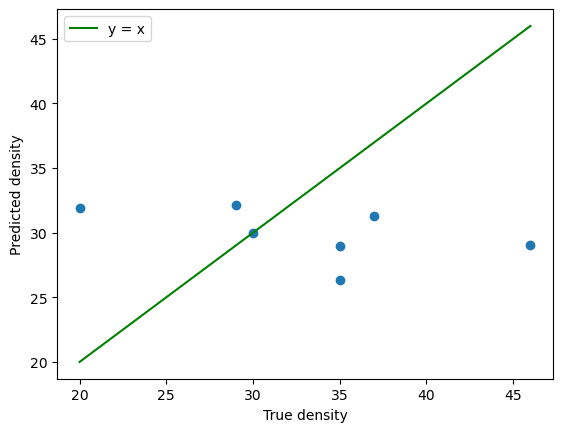

In [72]:
plt.scatter(block_0305_true_and_forecasted_values_df['True_count'], block_0305_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 46], [20, 46], color='green', label='y = x')
plt.legend()
plt.show()

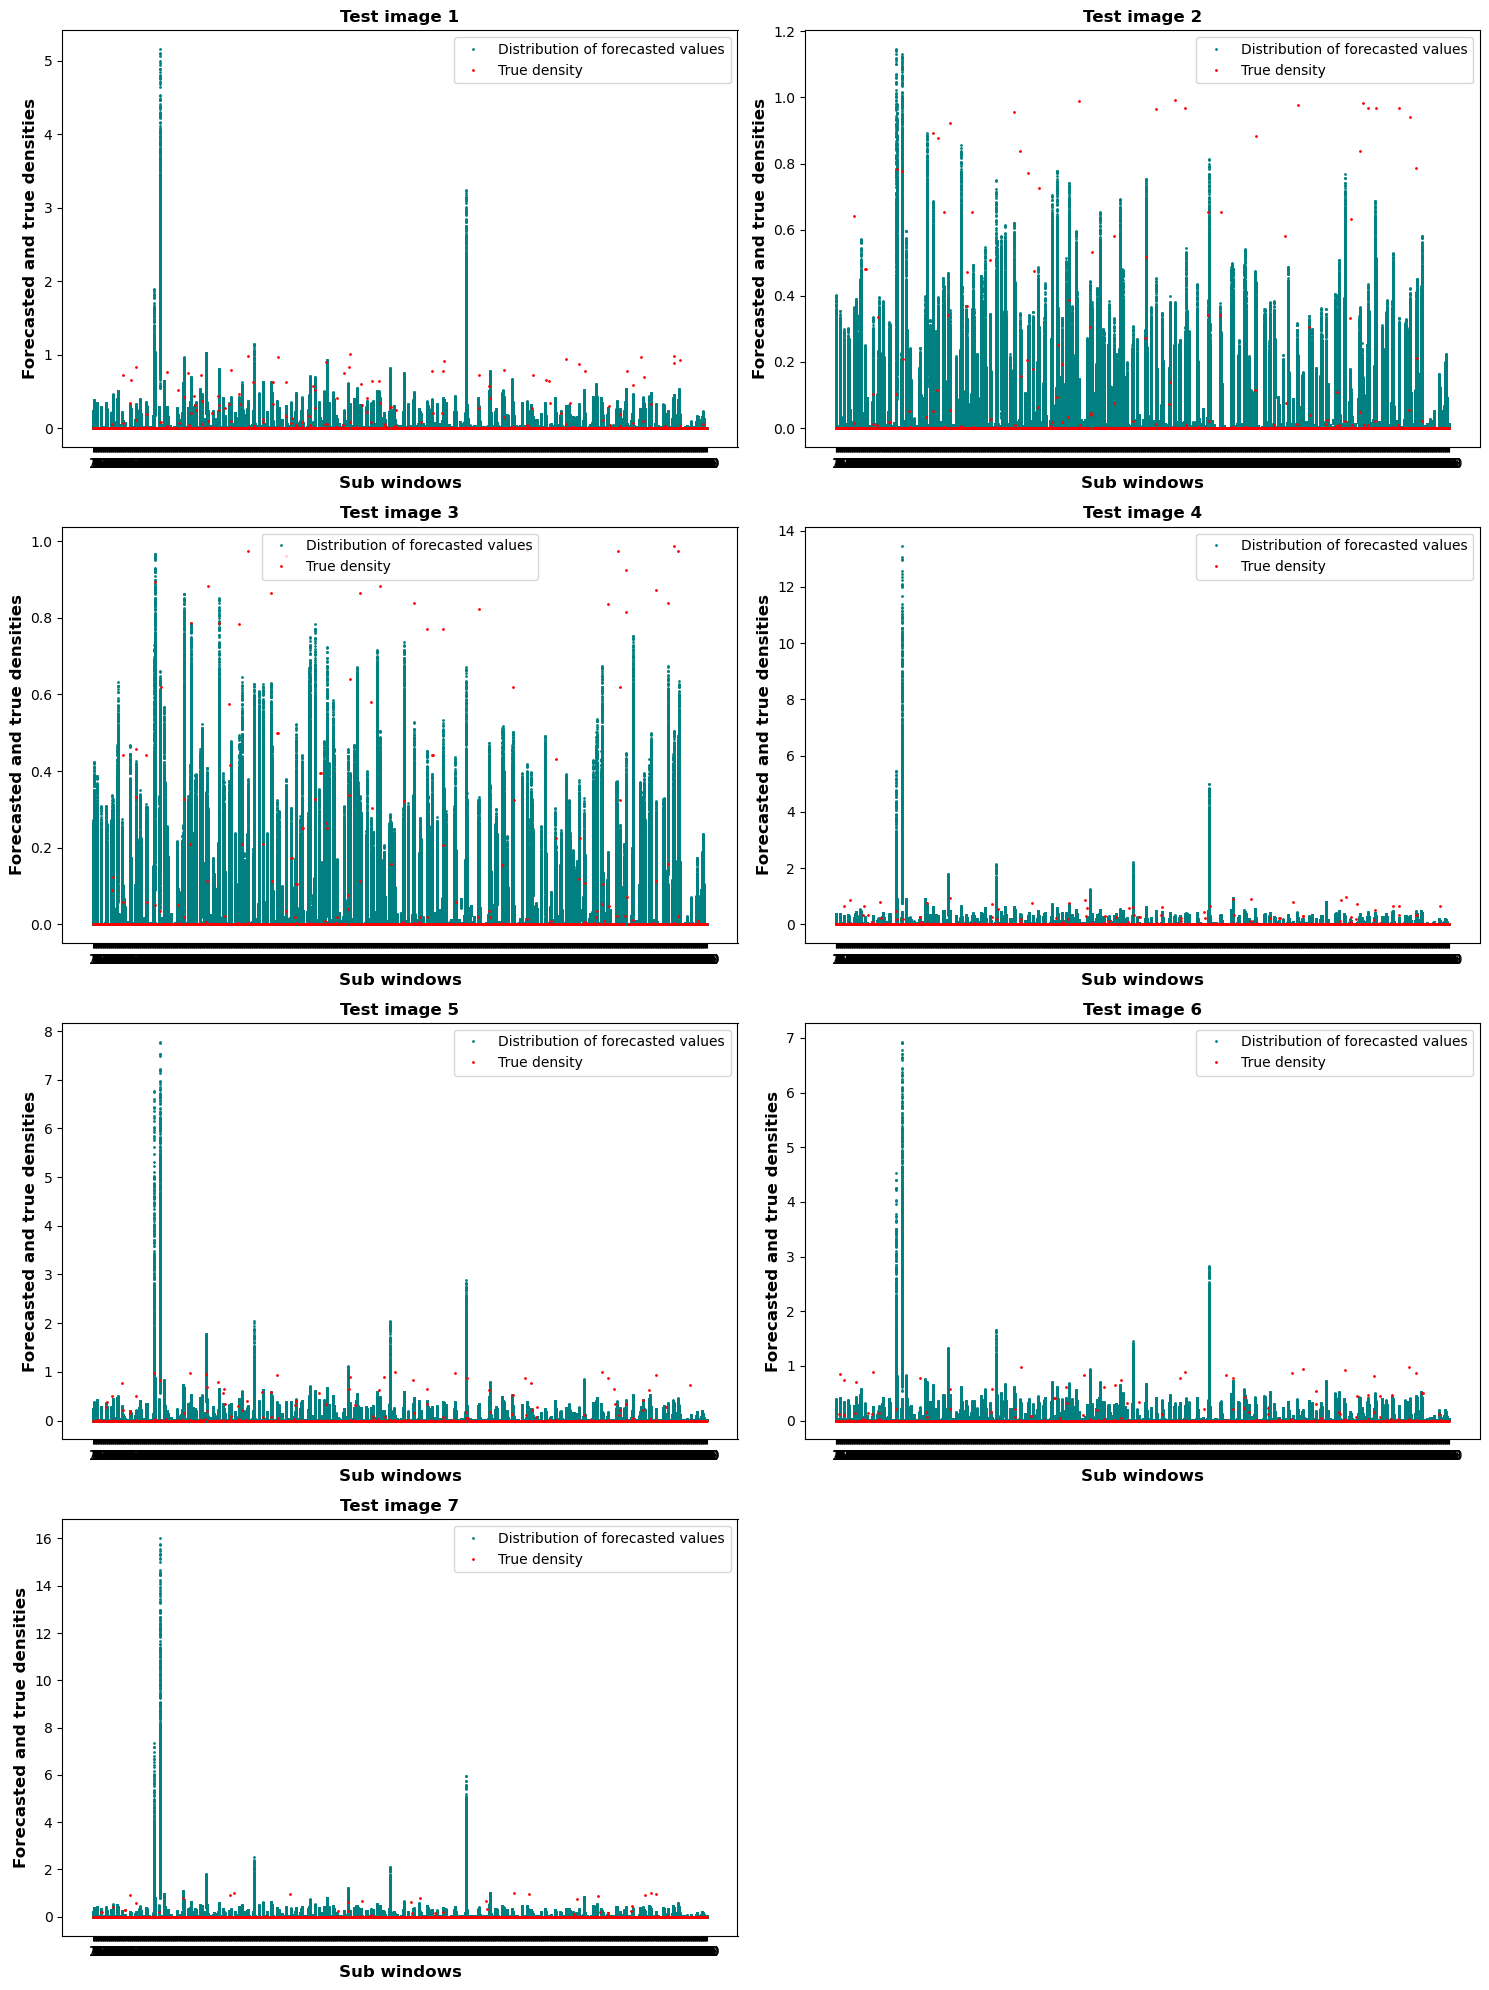

CPU times: user 28.1 s, sys: 906 ms, total: 29 s
Wall time: 28.7 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 